In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import networkx as nx

In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../code/'))
from utils.functional_graphs import compute_graph_measures, compute_degree_features, compute_edge_features

In [4]:
import warrior as war

WARRIOR
   brain initialized
   network initialized


In [5]:
sfcs = np.load('../local/fcs/sparse_fcs_100_unrelated_t0.15_852.npy')
sfcs.shape

(852, 100, 100)

In [6]:
N_SUBJECTS = sfcs.shape[0]
NODES = sfcs.shape[1]
EDGES = int((NODES*(NODES-1)) / 2)
EDGES

4950

In [7]:
fc = sfcs[0]
np.fill_diagonal(fc, 0)
pfc = np.where(fc>0,fc,0)
nfc = np.where(fc<0,fc,0)
fc.shape

(100, 100)

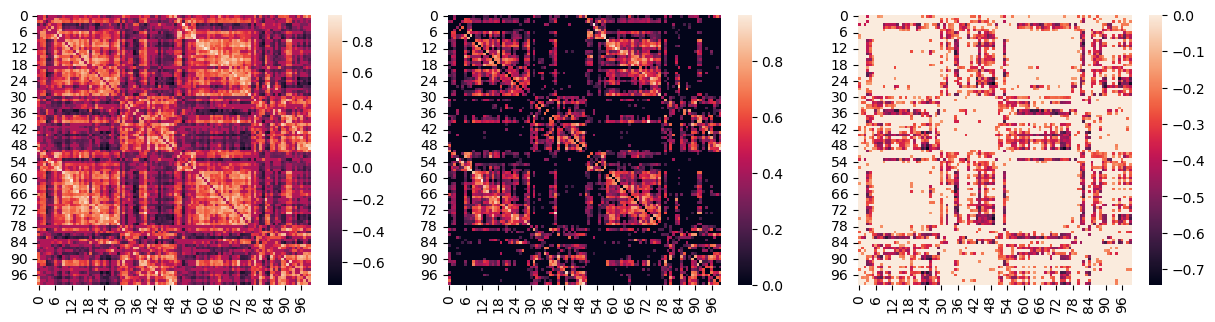

In [8]:
plt.figure(figsize=(15,3.5))
ax = plt.subplot(131)
sns.heatmap(fc)
ax = plt.subplot(132)
sns.heatmap(pfc)
ax = plt.subplot(133)
sns.heatmap(nfc)
plt.show()

In [9]:
fc = sfcs[0]
np.fill_diagonal(fc, 0)
pfc = np.where(fc>0,fc,0)
nfc = np.where(fc<0,fc,0)
for idx in np.arange(5):
    print(idx)
    s = fc[idx,:]
    strength = np.where(s!=0,s,0).sum()
    degree = np.where(s!=0,1,0).sum()
    p_strength = np.where(s>0,s,0).sum()
    p_degree = np.where(s>0,1,0).sum()
    n_strength = np.where(s<0,s,0).sum()
    n_degree = np.where(s<0,1,0).sum()
    print(f'Ful: {degree} {strength}')
    print(f'Pos: {p_degree} {p_strength}')
    print(f'Neg: {n_degree} {n_strength}')

0
Ful: 59 7.161443120332503
Pos: 39 11.891585777633335
Neg: 20 -4.730142657300829
1
Ful: 62 13.304232302336562
Pos: 51 16.04238589583803
Neg: 11 -2.7381535935014703
2
Ful: 78 16.095725288146063
Pos: 57 21.819094110536703
Neg: 21 -5.723368822390636
3
Ful: 74 -16.504011189771692
Pos: 15 4.885846414850201
Neg: 59 -21.389857604621895
4
Ful: 64 -11.8142305588277
Pos: 11 3.7714355647218687
Neg: 53 -15.58566612354957


In [10]:
G = nx.from_numpy_array(fc)
print(f'Directed: {nx.is_directed(G)}')
print(f'Nodes: {G.number_of_nodes()}')
print(f'Edges: {G.number_of_edges()}')
print(f'Density: {G.number_of_edges() / EDGES:.2f}')

Directed: False
Nodes: 100
Edges: 3514
Density: 0.71


In [21]:
nx_edge_list = np.array(G.edges)
print(nx_edge_list.shape)
nx_edge_list[:5,:]

(3514, 2)


array([[0, 2],
       [0, 3],
       [0, 7],
       [0, 8],
       [0, 9]])

In [18]:
# IN_CENTRALITY, OUT_CENTRALITY, CLUSTERING
measures = compute_graph_measures(fc)
print(measures.shape)
measures[:5,:]

(100, 2)


array([[0.0797618 , 0.69257744],
       [0.09080167, 0.82548916],
       [0.11138616, 0.77289377],
       [0.10398836, 0.75083302],
       [0.08881686, 0.7281746 ]])

In [19]:
# STRENGHT, DEGREE, P_STRENGHT, P_DEGREE, N_STRENGHT, N_DEGREE,
measures = compute_degree_features(fc) # 
print(measures.shape)
np.round(measures[:5,:],3)

(100, 6)


array([[ 59.   ,  39.   ,  20.   ,   7.161,  11.892,  -4.73 ],
       [ 62.   ,  51.   ,  11.   ,  13.304,  16.042,  -2.738],
       [ 78.   ,  57.   ,  21.   ,  16.096,  21.819,  -5.723],
       [ 74.   ,  15.   ,  59.   , -16.504,   4.886, -21.39 ],
       [ 64.   ,  11.   ,  53.   , -11.814,   3.771, -15.586]])

In [20]:
# CORRELATION VALUE
measures = compute_edge_features(fc, nx_edge_list) 
print(measures.shape)
np.round(measures[:10],3)

(3514,)


array([ 0.342, -0.378, -0.175, -0.152,  0.167,  0.188,  0.176,  0.24 ,
        0.184,  0.227])